# Python on lab bench

Bartosz Teleńczuk 

with contributions of FOSS community

# Prelude

## What is science?

Definition:

> Science is what scientists do.

* myth of "scientifc method"
* we became scientists by following examples (mastership)
* we are all scientists
* ... so we don't have to prove it by being "scientific"

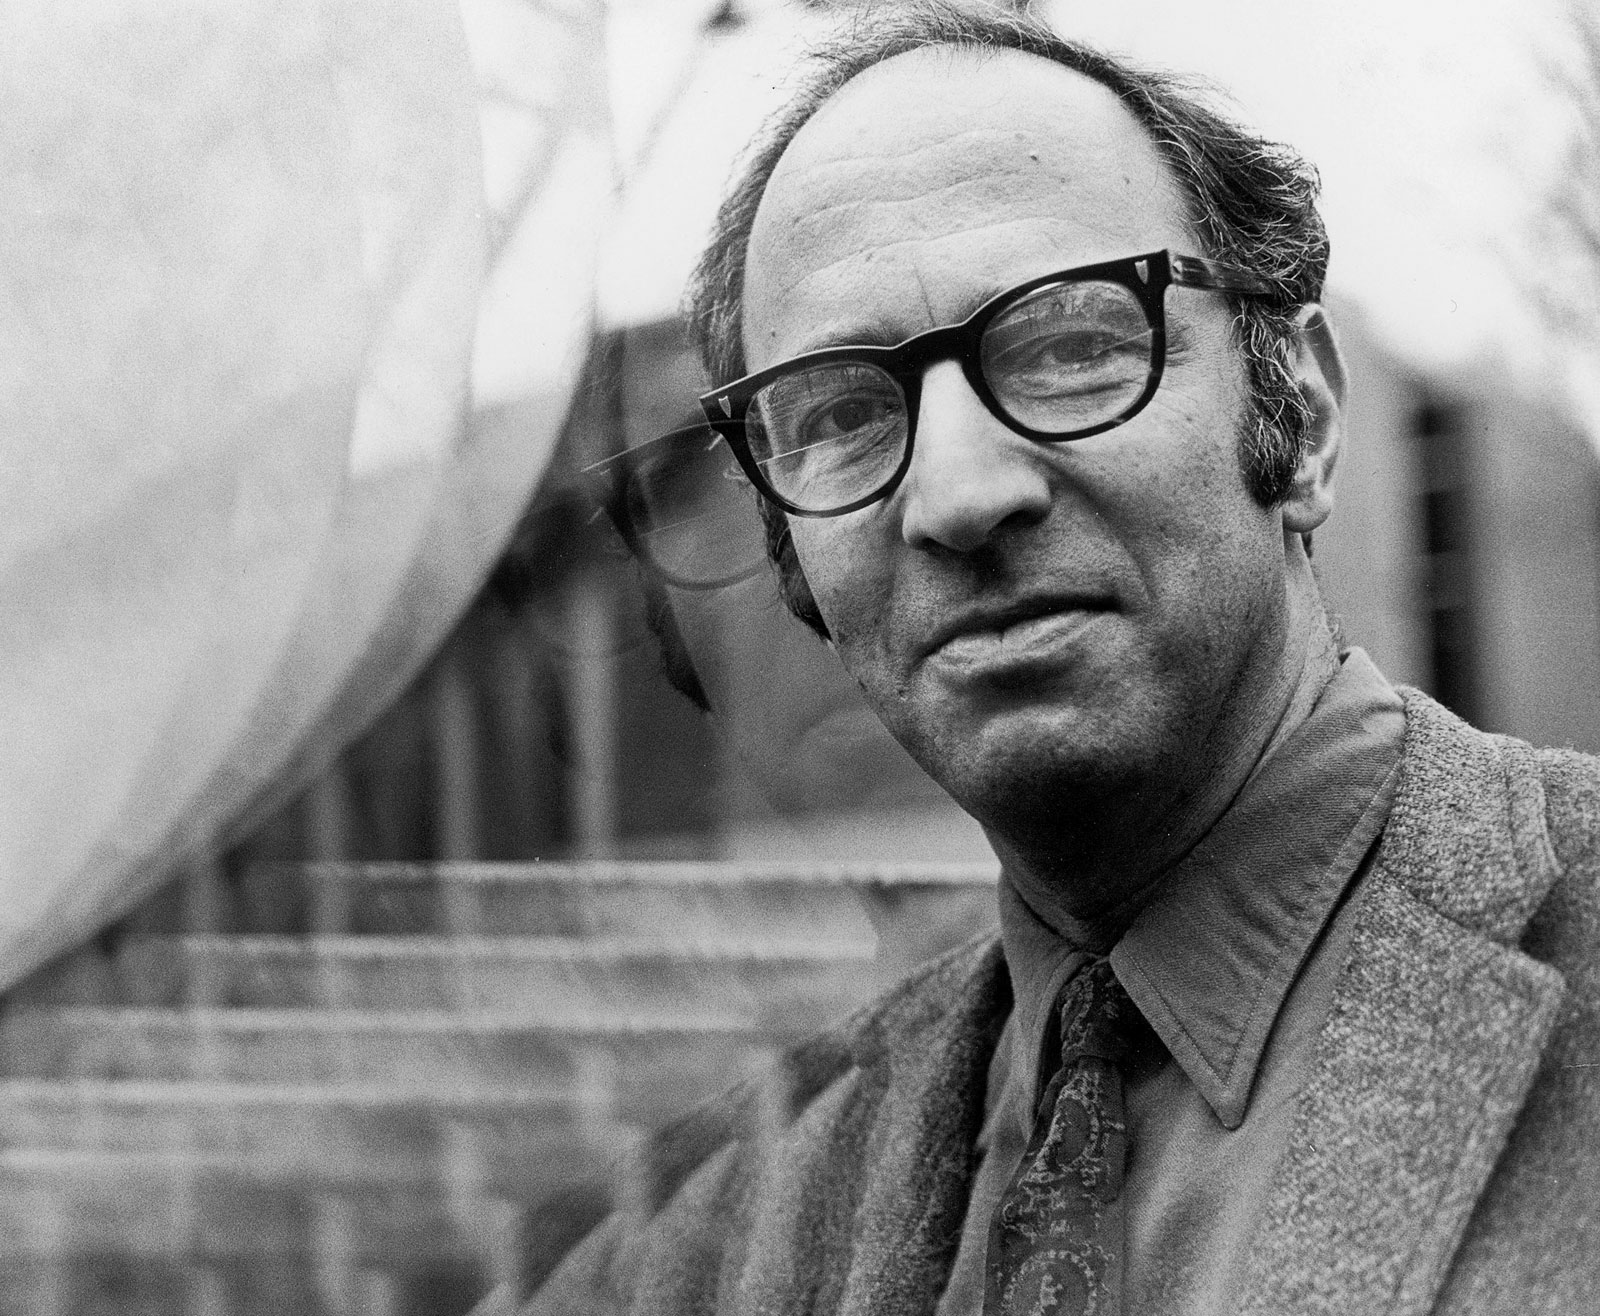

In [1]:
from IPython.display import Image
Image('http://www.hepsiburada.com/blog/bibliyoman/wp-content/uploads/2014/09/Thomas-Samuel-Kuhn.jpg')

## Science as an art of problem solving

* scientific computing $\neq$ software engineering (although both can learn from each other)
* **rapid** prototyping
* dovetailing processing steps
* interoperability of tools in different languages
* each problem is different and needs special method/tools/process
* publishing = reproducibility

## Tips

* focus on problems rather than tools
* fail early fail often
* test your assumptions
* learn the tools used in your field

* invest 70% of your time in understanding the problem
* no fancy programming technique/stats will trump domain knowledge

## Neural code 1

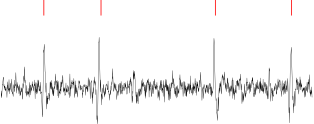

In [2]:
from IPython.display import SVG
SVG('images/spike_train.svg')

## Neural code 2

Data from Simmons, Prentice, Tkacik, Homann, Yee, Palmer, Nelson, & Balasubramanian (2013).  Transformation of Stimulus Correlations by the Retina.  PLOS Computational Biology, [10.1371/journal.pcbi.1003344](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003344)

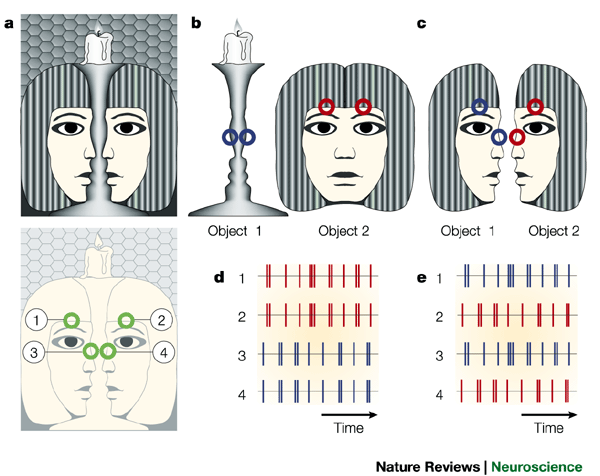

In [3]:
Image('images/nrn1001-704a-i2.png')

# Project cycle


* **Phase 1**: Data exploration
* **Phase 2**: Analysis workflow
* **Phase 3**: Batch processing
* **Phase 4**: Automation



# Phase 1:
# Data exploration

> Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone -- as the first step.
>
> &mdash; John W. Tukey in *Exploratory Data Analysis*

## What is exploratory data analysis?

* checks data sanity
* prepares for "confirmatory data analysis"
* leads to serendipitous findings
* helps to form new hypotheses
* sets standards for further experiments
* allows to select best tools and procedures

## Storing parameters

* within a source code
* in a seperate Python module
* in a shell script
* in a text file (JSON, YAML)

# Phase 2:
# Data analysis workflow

## What is data analysis workflow?

* Interchangable elements connected by a common interface.
* planning and scheduling
* data-flow oriented
* provenance

## Steps

* database access / query
* data analysis
* visualisation

##  Workflow managers

General purpose:

* command line: drake
* Python-based: jedi, joblib
* Web/GUI-based: Taverna, Kepler, VisTrails

Specialised:

* machine learing: modular data processing toolbox (MDP), RapidMiner
* bioinformatics: Galaxy
* 3D visualisation: VTK

## Simple Python-based workflow

```python
import first_script
import second_script
import third_script

result1 = first_script.main('/location/of/datafile')
result2 = second_script.main(result1)
result3 = third_script.main(result2)
```

Cons:

* sometimes hard to clean the runtime (for example, neuron) 
* hard to use programs written in other languages (need for wrapper scripts)
* intermediate results are not kept (but it can be added)

## Data storage

* text files: comma-seperated values (CSV),
* python-specific: pickle/numpy files
* binary data standards: HDF5

## The power of shell (aka command line)

* shell is (yet another) programming language
* specialises on operations with files and executing external tools (incl. Python scripts)

* allows to pass parameters to programs (command-line arguments)
* language agnostic
* powerful editors (vim, emacs)

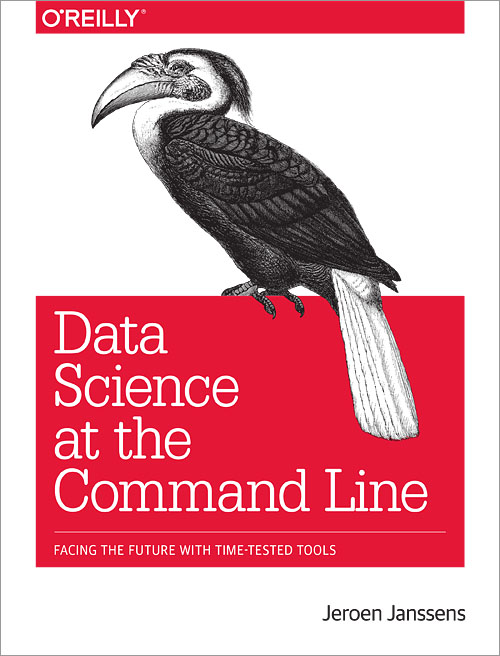

In [4]:
Image('images/cover_command_line_data_science.jpg')

## Unix philosophy

> Unix philosophy emphasizes building short, simple, clear, modular, and extensible code that can be easily maintained and repurposed by developers other than its creators



* Small is beautiful.
* Make each program do one thing well.
* Build a prototype as soon as possible.
* Store data in flat text files.



* we will be using only a subset of the Unix philosophy

# Phase 3:
# Batch processing

## Directory tree

In [7]:
!tree .. -C -L 2 --dirsfirst --noreport

..
├── data
│   ├── Data.zip
│   └── README.txt
├── docs
│   ├── images
│   ├── intro.ipynb
│   └── outline.txt
├── figures
├── libs
│   └── pyNeuro
├── results
├── scripts
│   ├── batch_analyse.py
│   ├── calculate_correlations.py
│   ├── merge_script.py
│   └── plot_correlations.py
├── workflows
│   ├── dodo.py
│   └── run_workflow.sh
└── Makefile


## Batch processing

* run same analysis on a set of data
* usually lets itself to easy parallization (embarassingly parallel)

## Simple Python-based batch processing

```python
import single_analysis
files = ['../data/file1.txt', 
         '../data/file2.txt']

for fname in files:
    single_analysis.main(fname)
```

Cons:
    
* again harder to do with non-python programs
* you need to be sure to keep the module namespace "clean"

## Globbing

```python
import single_analysis
import glob

files = glob.glob('../data/file*.txt')

for fname in files:
    single_analysis.main(fname)
```

# Phase 4:
# Automation

## Who is it good for?

Software engineers:

* compiling computer source code into binary code
* running automated tests
* creating documentation

Scientists:

* running analyses
* producing figures
* compiling source documents (such as $\LaTeX$)

## Dependency tracking

You specify rules and recipes, build tool determines which ones to execute and in what order of execution.

Example:

```
Rule 1:
    input.txt --| python script1.py |--> intermediate.txt

Rule 2:
    intermediate.txt,params.json --| python script2.py |--> results.txt
```

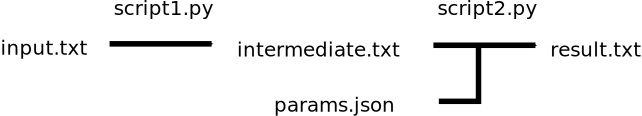

In [12]:
SVG('images/dependency_graph.svg')

## Automation tools

* build tools: make, cmake, ant
* Python-based build tools: SCons, waf
* general-purpose: doit, rake
* specialised data analysis: drake, luigi

* build tools -- specialising at building software, usually include rules for various programming (and typesetting) languages
* Python-based tools -- specialising at building software, can be extended using Python syntax
* general-purpose -- configurable, usually no (or little) pre-exisiting rules
* specialised data analysis -- often prepared to work with hadoop, access databases etc.

make:

* only single target
* pattern rules very powerful, but might be unpredictable

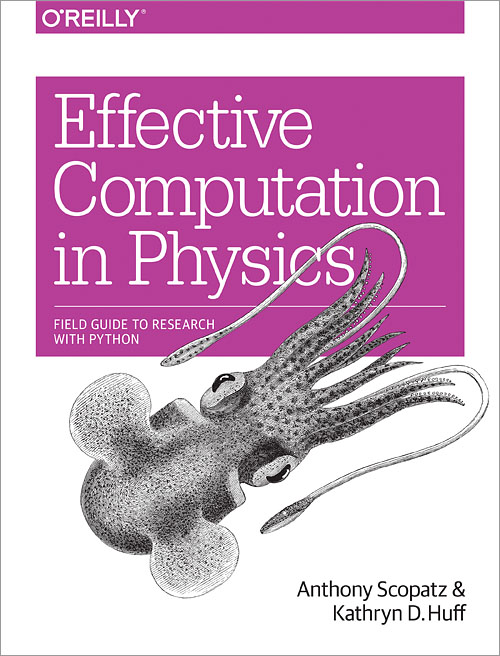

In [6]:
Image('images/cover_effective_computation.jpg')